# Análisis de los límites de número de partículas del Quadtree

Verificamos que número de partículas puede ser implementado con el código de quadtree sabiendo que es sensible a los parámetros:

NCRIT = 5

MAX_NEI = 48

Sabemos que anteriormente el código falló con una malla de 50x50 pero veamos en que punto falla, para lo cuál se crea la carpeta "quadtree_verification" donde creamos las condiciones iniciales de prueba para verificar que el árbol no produzca violaciones de segmento. Sabemos que el árbol funciona adecuadamente para una malla de 40x40 por lo que se propone 45x45 como prueba inicial de falla.

1. Visualicemos la figura de los 40x40 para tener como referencia

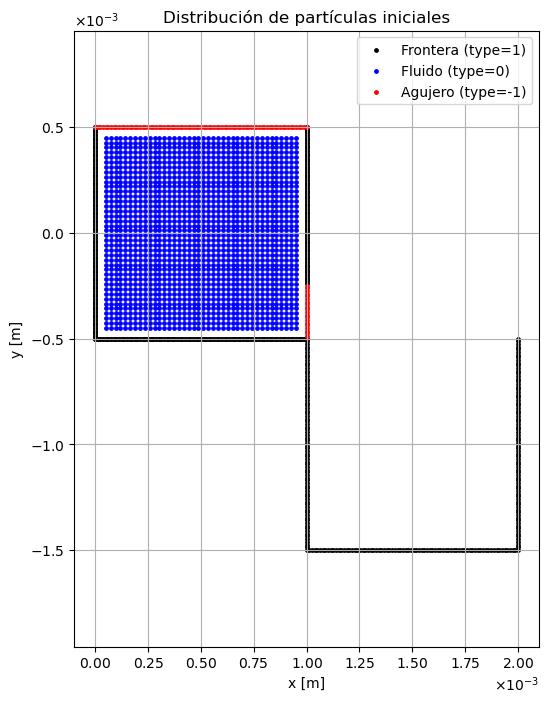

In [1]:
from utils.plot_ics import plot_ics
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

ics_vaciado20_40x40 = f"{PROJECT_ROOT}/Output/init_cond/vaciado20_40x40_tree/vaciado20_est40x40.txt"

plot_ics(ics_vaciado20_40x40)

2. Comencemos creando la figura con un fluido cuadrado de 45x45.

In [2]:
from utils.create_ics import create_ics_txt

BOUNDARY_FILE45 = "quadtree_verification/vaciado10_45x45_boundary.json"
FLUID_FILE45 = "quadtree_verification/vaciado10_45x45_fluid.json"

OUTPUT_NAME45 = "quadtree_verification/vaciado10_45x45.txt"
OUTPUT_LOG45 = "quadtree_verification/vaciado10_45x45.log"

create_ics_txt(BOUNDARY_FILE45,
               FLUID_FILE45,
               OUTPUT_NAME45,
               OUTPUT_LOG45,
               PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_45x45_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/quadtree_verification/vaciado10_45x45_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   quadtree_verification/vaciado10_45x45.txt
  • Nombre archivo resumen:  quadtree_verification/vaciado10_45x45.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/quadtree_verification/vaciado10_45x45.txt



0

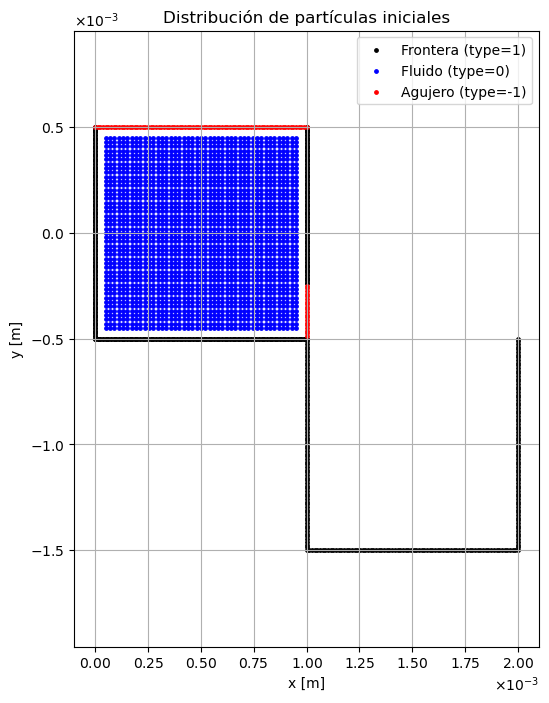

In [3]:
from utils.plot_ics import plot_ics

ics_vaciado10_45x45 = f"{PROJECT_ROOT}/Output/init_cond/quadtree_verification/vaciado10_45x45.txt"

plot_ics(ics_vaciado10_45x45)

4. Configuración específica de quadtree para esta geometría y unos 2000 pasos de base para saber si esta no genera la violación de segmento.

In [4]:
from utils.create_simJSON import create_simulation_config

OUTPUT_45TXT = "Output/init_cond/quadtree_verification/vaciado10_45x45.txt"

create_simulation_config(
    experiment_name="vaciado10_45x45_tree",
    input_file=OUTPUT_45TXT,
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 2000,
    neighbor_method="quadtree",
    output_tests="Output/vaciado10_45x45_tree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado10_45x45_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_45x45_tree/params.json')

5. Ejecutamos la simulación en base al JSON antes generado.

In [7]:
from utils.run_sim import run_single_simulation
from pathlib import Path

vaciado10_45x45_dir = Path(f"{PROJECT_ROOT}/Output/vaciado10_45x45_tree")

run_single_simulation(
    experiment_dir=vaciado10_45x45_dir,
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=6300
)


🚀 Ejecutando simulación: vaciado10_45x45_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado10_45x45_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2804 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2805 partículas desde el archivo Output/init_cond/quadtree_verification/vaciado10_45x45.txt

[particleSummary] Número total de partículas: 2805
Fluido: 2025, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/vaciado10_45x45_tree/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadt

In [3]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_ROOT = f"{PROJECT_ROOT}/Output/vaciado_estabilizacion4k/Output/state_0000.txt"
print(BASE_ROOT)

/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado_estabilizacion4k/Output/state_0000.txt


In [ ]:
generar_script_gnuplot(BASE_ROOT, lim=39, retardo=0.1, nombre_salida="vaciado_est4k.gp")

✅ Script Gnuplot generado correctamente: vaciado_est4k.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–230 (231 partículas)
  Tipo -1: líneas 231–321 (91 partículas)
  Tipo 1: líneas 322–789 (468 partículas)
  Tipo 0: líneas 790–2389 (1600 partículas)
